# Term Deposit Lead Prediction for financial institution

To identify a list of customers who could be contacted via telecommunication channels to open a term deposit account with this institution. The firm wants a list of only 1000 customers for the target list to increase the number of term deposit accounts.

Dataset understanding-
 

1.We will run our algorithm on the dataset which contains a list of customers, who were approached to open a term deposit account in past campaigns to know the accuracy of our model.


2.Then we will use the model on the dataset from which we need to identify the top 1000 customers, who will be in the target list of the campaign.

In [1]:
import pip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from scipy.io import arff

In [2]:
pd.set_option('display.max_columns', 50)
df=pd.read_csv("Historical_data_set.csv")
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [3]:
df.shape

(23880, 17)

We have 23800 records with 17 different features including customer_id and term_deposit_subscribed

In [4]:
type(df.shape)

tuple


Most of the columns are object type, but for developing model we need numeric values and some label encoding as well, so now we will change datatype of some columns and change string values to numeric values by encoding them.

In [5]:
df.dtypes

customer_id                    object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
day_of_month                    int64
month                          object
last_contact_duration           int64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
dtype: object

There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as category and encode them.

In [6]:
print("Job type: ",df.job_type.unique())
print("Marital: ",df.marital.unique())
print("Education: ",df.education.unique())
print("Communication type: ",df.communication_type.unique())
print("Prev campaign outcome: ",df.prev_campaign_outcome.unique())
print("Default: ",df.default.unique())
print("Housing loan: ",df.housing_loan.unique())
print("Personal loan: ",df.personal_loan.unique())

Job type:  ['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
Marital:  ['married' 'single' 'divorced' nan]
Education:  ['secondary' 'primary' 'tertiary' 'unknown']
Communication type:  ['cellular' 'unknown' 'telephone']
Prev campaign outcome:  ['other' 'unknown' 'failure' 'success']
Default:  ['no' 'yes']
Housing loan:  ['no' 'yes']
Personal loan:  ['yes' 'no' nan]


In [7]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [8]:
df['job_type']=df['job_type'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['communication_type']=df['communication_type'].astype('category')
df['prev_campaign_outcome']=df['prev_campaign_outcome'].astype('category')
df['default']=df['default'].astype('category')
df['housing_loan']=df['housing_loan'].astype('category')
df['personal_loan']=df['personal_loan'].astype('category')
df.dtypes

customer_id                     object
customer_age                   float64
job_type                      category
marital                       category
education                     category
default                       category
balance                        float64
housing_loan                  category
personal_loan                 category
communication_type            category
day_of_month                     int64
month                           object
last_contact_duration            int64
num_contacts_in_campaign       float64
num_contacts_prev_campaign       int64
prev_campaign_outcome         category
term_deposit_subscribed          int64
dtype: object

Here we have encoded fields with numbers by pandas build-in get_dummies method, and using that method we need to give prefix for new fields which will be generated.


This method will generate new fields with prefix and category name as column name and 0 or 1 will be their value.
As we can see below, we got all the new fields with values as 0 or 1.

As we can see below, we got all the new fields with values as 0 or 1.

In [9]:
dfjob_typeDummies = pd.get_dummies(df['job_type'], prefix = 'job')
dfmaritalDummies = pd.get_dummies(df['marital'], prefix = 'marital')
dfeducationDummies = pd.get_dummies(df['education'], prefix = 'education')
dfcommunication_typeDummies = pd.get_dummies(df['communication_type'], prefix = 'com_type')
dfprev_campaign_outcomeDummies = pd.get_dummies(df['prev_campaign_outcome'], prefix = 'prev_op')
dfhousing_loanDummies = pd.get_dummies(df['housing_loan'], prefix = 'house')
dfpersonal_loanDummies = pd.get_dummies(df['personal_loan'], prefix = 'personal')
dfdefaultDummies = pd.get_dummies(df['default'], prefix = 'default')


In [10]:
print(dfjob_typeDummies.head(3))
print(dfmaritalDummies.head(3))
print(dfeducationDummies.head(3))
print(dfcommunication_typeDummies.head(3))
print(dfprev_campaign_outcomeDummies.head(3))
print(dfhousing_loanDummies.head(3))
print(dfpersonal_loanDummies.head(3))
print(dfdefaultDummies.head(3))
df.head(2)

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                1                 0              0   
1           0                1                 0              0   
2           0                1                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  
0               0               0            0  
1               0               0            0  
2               0               0            0  
   marital_divorced  marital_married  marital_single
0                 0                1               0
1                 0                1               0
2                 0                1               0
  

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0


Now we have new dataframes by label encoding, so we will concat them with our existing dataframe, but before that we will remove category fields as we don't need them right!

In [11]:
df.drop(['job_type','marital','education','communication_type','prev_campaign_outcome','default','housing_loan','personal_loan'], axis=1, inplace=True)

df = pd.concat([df, dfjob_typeDummies], axis=1)
df = pd.concat([df, dfmaritalDummies], axis=1)
df = pd.concat([df, dfeducationDummies], axis=1)
df = pd.concat([df, dfcommunication_typeDummies], axis=1)
df = pd.concat([df, dfprev_campaign_outcomeDummies], axis=1)
df = pd.concat([df, dfdefaultDummies], axis=1)
df = pd.concat([df, dfhousing_loanDummies], axis=1)
df = pd.concat([df, dfpersonal_loanDummies], axis=1)

df.head()
df.shape

(23880, 41)

We'll convert all fields to number type in dataframe for our model.



Here we are wrapping up data preparation phase.



Here we are removing the attritubes which are directly co related to each other.

In [12]:
numericColumns=np.array(['customer_age','balance','day_of_month',
                         'last_contact_duration',
                         'num_contacts_in_campaign','num_contacts_prev_campaign', 'term_deposit_subscribed',
                         'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management',
                         'job_retired','job_self-employed','job_services','job_student','job_technician',
                         'job_unemployed','job_unknown','marital_divorced','marital_married','marital_single',
                         'education_primary','education_secondary','education_tertiary','education_unknown',
                         'com_type_cellular','com_type_telephone','com_type_unknown','prev_op_failure',
                         'prev_op_other','prev_op_success','prev_op_unknown','month','default_no','default_yes','house_no','house_yes','personal_no','personal_yes'])
                         
for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.drop(['day_of_month','month'], axis=1, inplace=True)
df.dtypes   
df.shape

(23880, 39)

We'll save our model data to new csv file without customerID, as we won't be using that in our model development.

In [13]:
modelData = df.loc[:, df.columns != 'customer_id']
modelData.to_csv('modelData.csv')

# Model Development

After reading our model data, we'll take our training and target data in numpy arrays

Here we drew heatmap to find relation between various attributes and make our data more clean and efficient.

In [14]:
modelData=pd.read_csv('modelData.csv',index_col=0)
modelData[modelData==np.inf]=np.nan
modelData.fillna(modelData.median(), inplace=True)

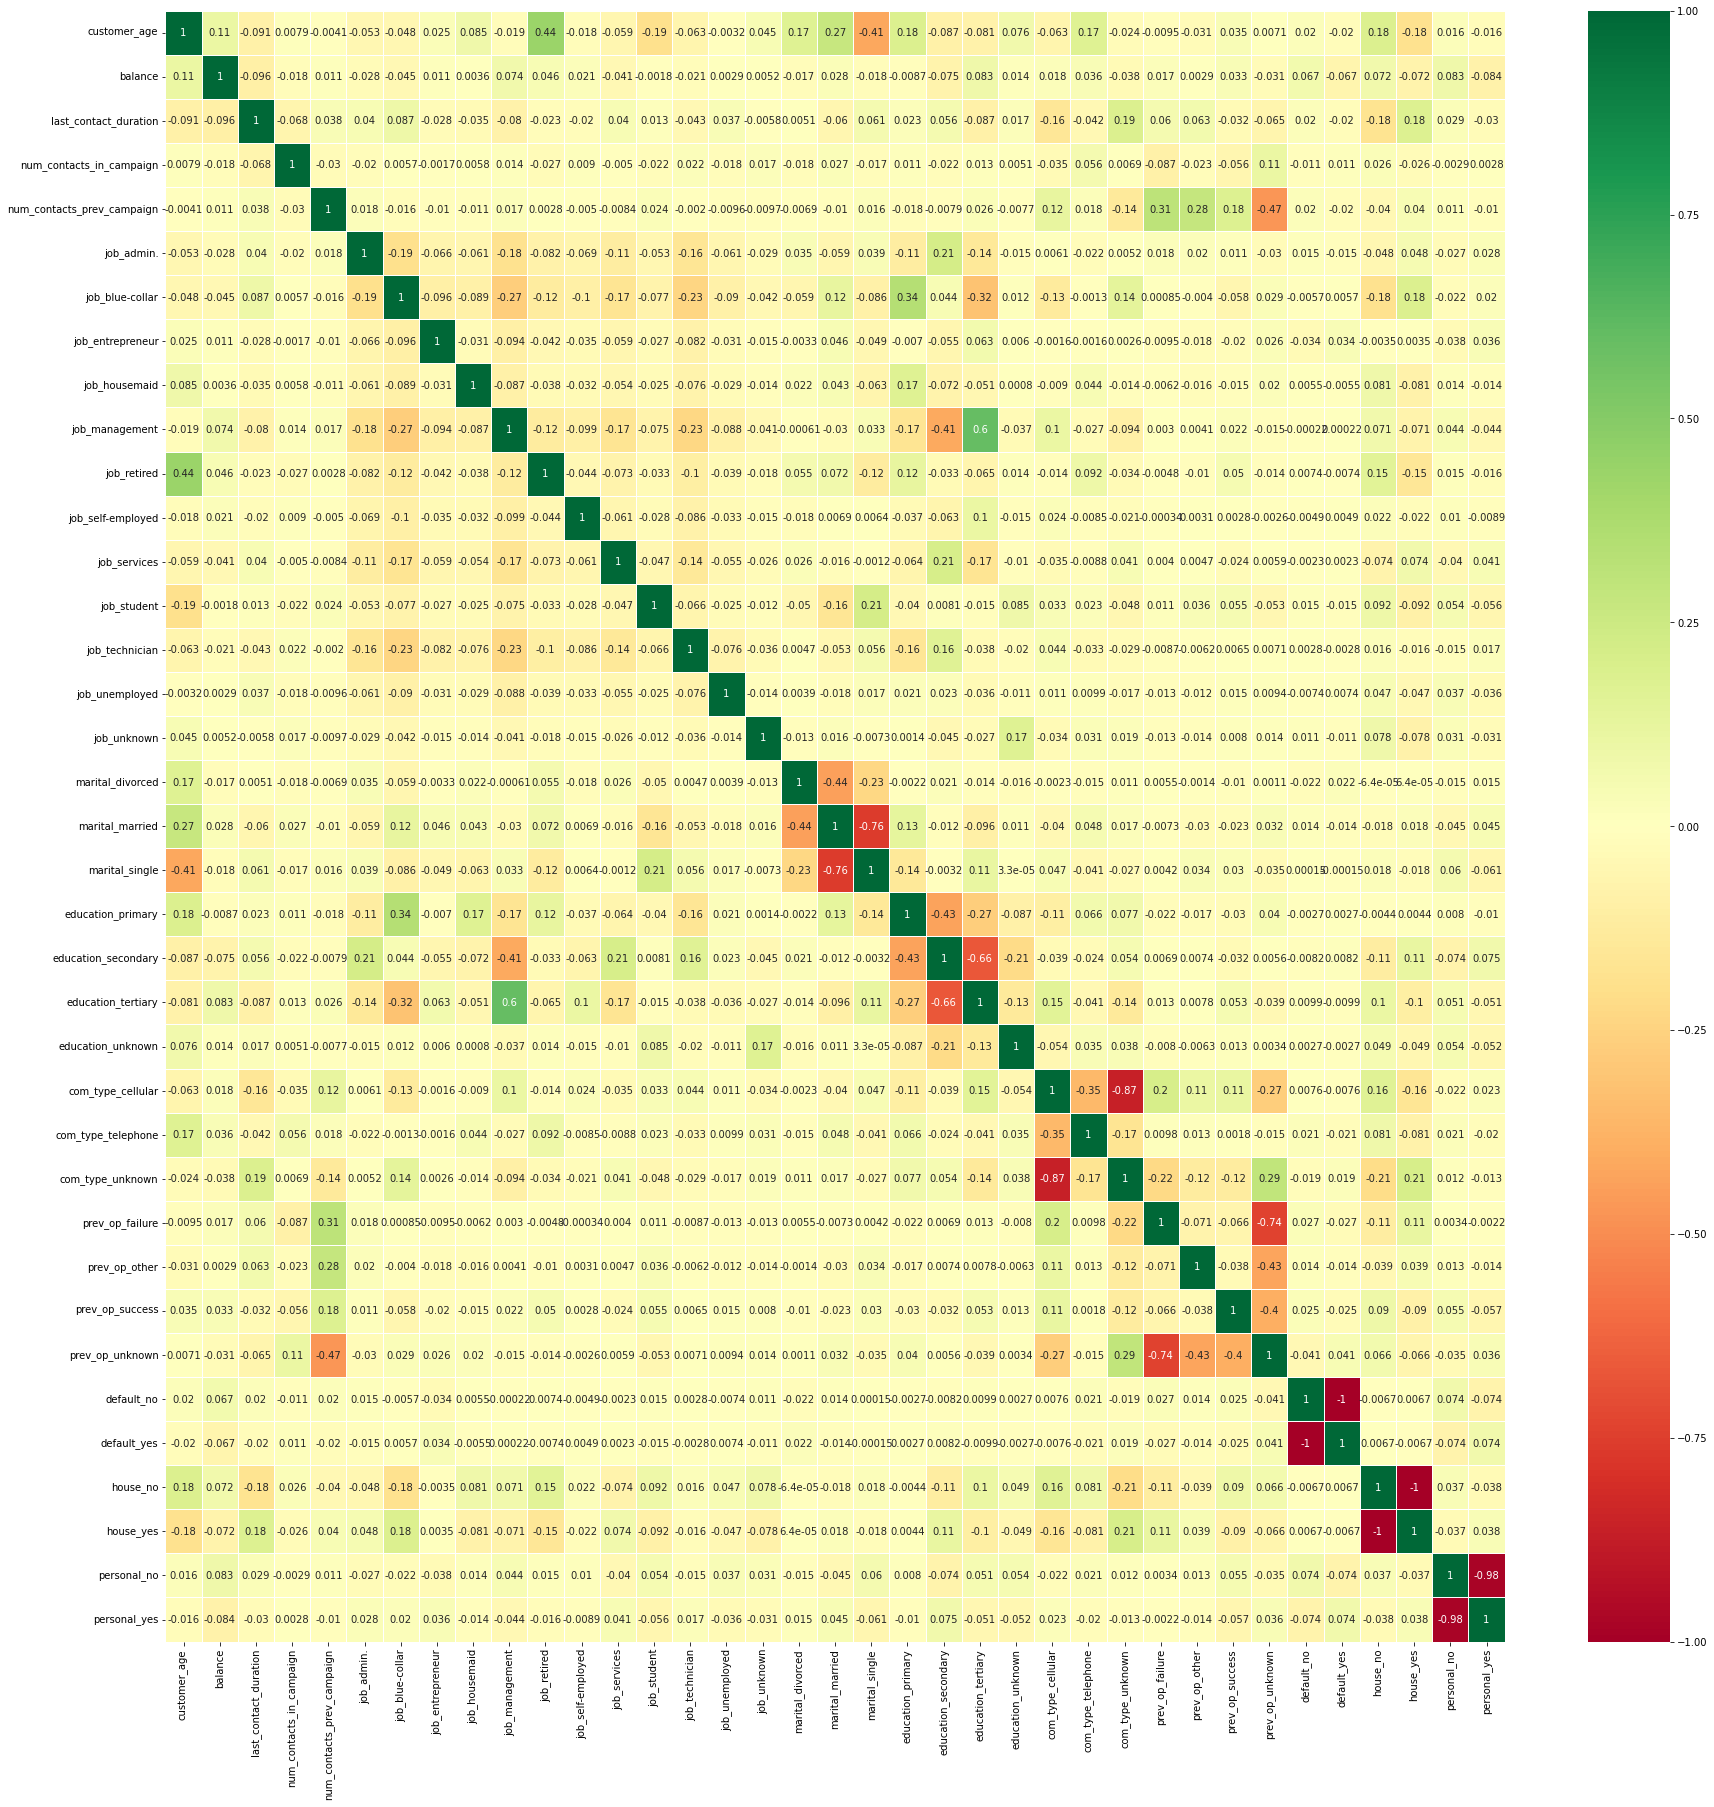

In [15]:
sns.heatmap(modelData.loc[:,modelData.columns != 'term_deposit_subscribed'].corr(),xticklabels=True, yticklabels=True,annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

# To find accuracy of model


In [17]:
x=np.asarray(modelData.loc[:,modelData.columns != ('term_deposit_subscribed')])
y=np.asarray(modelData['term_deposit_subscribed'])
print(x[:2])
print(y[:2])

[[3.400e+01 9.340e+02 7.040e+02 2.000e+00 1.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+00]
 [4.100e+01 1.352e+03 8.930e+02 2.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00]]
[0 0]


Here we'll normalize our data by using sklearn's StandardScaler

In [18]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:2]

array([[-5.95952491e-01, -1.39594738e-01, -2.02425051e+00,
        -2.45770768e-01,  1.58574369e-01, -3.58307751e-01,
         1.90305999e+00, -1.82901794e-01, -1.68987162e-01,
        -5.15007374e-01, -2.27589631e-01, -1.91528870e-01,
        -3.20463278e-01, -1.46537299e-01, -4.47078750e-01,
        -1.70553682e-01, -8.05653128e-02, -3.64086104e-01,
         8.20562931e-01, -6.24943950e-01, -4.19324903e-01,
         9.67853119e-01, -6.43510315e-01, -2.07528438e-01,
         7.36232280e-01, -2.59074299e-01, -6.36944377e-01,
        -3.50523056e-01,  4.93733311e+00, -1.87736931e-01,
        -2.11383180e+00,  1.35092719e-01, -1.35092719e-01,
         1.12778793e+00, -1.12778793e+00, -2.27073244e+00,
         2.31104853e+00],
       [ 6.13150914e-02, -4.27226849e-04,  5.11435058e-01,
        -2.45770768e-01, -2.22463660e-01, -3.58307751e-01,
         1.90305999e+00, -1.82901794e-01, -1.68987162e-01,
        -5.15007374e-01, -2.27589631e-01, -1.91528870e-01,
        -3.20463278e-01, -1.46

It is recommended practice of splitting data in training and testing before using it in model, in our case we are keeping 80/20 data for training and testing respectively.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=72)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19104, 37) (19104,)
Test set: (4776, 37) (4776,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=37)
model.fit(X_train, y_train)
prediction_test=model.predict(X_test)
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(y_test,prediction_test))



Accuracy =  0.9013819095477387


# To find attribute weightage on complete dataset


In [21]:
fData = df.loc[:, df.columns != ('customer_id','term_deposit_subscribed')]
fData.to_csv('fData.csv')
fData=pd.read_csv('fData.csv',index_col=0)
fData[fData==np.inf]=np.nan
fData.fillna(fData.median(), inplace=True)
fData.drop(['term_deposit_subscribed','customer_id'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15832\1980001973.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fData.fillna(fData.median(), inplace=True)


In [22]:
feature_name=list(fData.columns)
print(feature_name)
print(len(feature_name))

['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'com_type_cellular', 'com_type_telephone', 'com_type_unknown', 'prev_op_failure', 'prev_op_other', 'prev_op_success', 'prev_op_unknown', 'default_no', 'default_yes', 'house_no', 'house_yes', 'personal_no', 'personal_yes']
37


In [23]:
feature_imp=pd.Series(model.feature_importances_,index=feature_name)
print(feature_imp)

customer_age                  0.158228
balance                       0.193322
last_contact_duration         0.198102
num_contacts_in_campaign      0.066672
num_contacts_prev_campaign    0.036965
job_admin.                    0.010910
job_blue-collar               0.010252
job_entrepreneur              0.005053
job_housemaid                 0.003940
job_management                0.012287
job_retired                   0.006939
job_self-employed             0.007079
job_services                  0.008663
job_student                   0.006124
job_technician                0.013494
job_unemployed                0.007289
job_unknown                   0.002130
marital_divorced              0.009336
marital_married               0.013142
marital_single                0.011529
education_primary             0.009413
education_secondary           0.014250
education_tertiary            0.013407
education_unknown             0.006674
com_type_cellular             0.010103
com_type_telephone       

Now we will use these attribute weightage to find whether the new customers will be interested to open term deposit account or not